In [1]:
import pandas as pd 
import numpy as np 

pseudo-codigo no overleaf
entender e explicar o pseudo codigo
validar simulacao


estado dos carros:
cp(j), cd(j), cb(j), cf(j), ct(j)
posicao - direcao - botoes - andares - tempo

M=10 pisos, N=2 carros

estados dos pisos:
ff(i)[], fb(i), ftc(i)
fila de pessoas, botao descer, botao subir, contador proxima chegada de pessoa

    
    Ts=3600 %para 1 hora
    ftc = inicializar
    M = 10
    N = 2
    lambda_value = 0.005
    
    for ts=1:Ts
        for i=1:M (para cada andar)
            if ftc(i) <= ts then
                ftc(i) = ftc(i) + exp(1/lambda);
                d = gera_dest();
                c = atribui_car(d)
                ff(i) <-- [ftc ,ta ,d ,c ]
                fb(d) = 1; %explicar  
            end if
        endfor-m
        
        for j=1:N (para cada elevador)
            if cp(j) mod 30 <> 0 then
                if cd(j) = 1 then
                    cp(j) = cp(j) + 1;
                if cd(j) = -1 then
                    cp(j) = cp(j) -1;
                else ERRO1;
            end if
                   
            if cp(j) mod 30 = 0 then
                f = quoc(cp(j) mod 30);
                buscar_passageiros(f, cf(j), cd(j)) --> explicar?
                descarregar_passageiros(f, cb(j), cd(j))
                atualizar_direcao()
                mover()
            end if
                
        endfor-N
    end-for-ts
    
    
Lembrete: toda vez que retira passageiros da s filas, salva os dados daquele passageiro [ftc, ta] num arquivo, que poder ser em disco ou em memória, para calcular média e variância do tempo de espera.

In [2]:
#carro
#variaveis do carro:  (CPj, CDj, CBj, CGj, CTj) car position, 
#car direction, clicked button, car get passengers waiting, temporizer
class Car:
    def __init__(self, name, car_position = 0, passengers = [], car_direction = 0, pressed_buttons = [], car_passengers_waiting = set(), temporizer = 0):
        self.car_position = car_position
        self.car_direction = car_direction
        self.pressed_buttons = pressed_buttons #destinos dos passageiros
        self.car_passengers_waiting = car_passengers_waiting #andares que passageiros entrarão
        self.temporizer = temporizer
        self.name = name
        self.passengers = passengers
        
    def car_action(self, floor):
        if (floor.number in self.pressed_buttons):
            #retira os  passageiros
            remove = 0
            for p in self.passengers:
                print("Teste saida: {} para {}".format(p.destination, floor.number))
                if (p.destination == floor.number):
                    print("passageiro sai")
                    remove +=1
                    
            for i in range(remove):
                for p in self.passengers:
                    if (p.destination == floor.number):
                        if (floor.number in self.pressed_buttons):
                            self.pressed_buttons.remove(floor.number)
                        #atualiza o attendance
                        p.attendance = self.temporizer
                        #salva nos passageiros atendidos
                        passengers_served.append(p)
                        #remove do elevador
                        self.passengers.remove(p)
                
        
        print("{} in {}".format(floor.number, self.car_passengers_waiting))
        self.update_direction()
        
        if (floor.number in self.car_passengers_waiting):
            print("Andar {}".format(floor.number))
            #pega os  passageiros
            passenger_still_waiting = False
            for p in floor.passengers_queue:
                if (p.selected_car == self.name):
                    if (p.destination > floor.number and self.car_direction == 1):
                        #entra
                        if (floor.number in self.car_passengers_waiting):
                            self.car_passengers_waiting.remove(floor.number)
                        #adiciona no elevador
                        self.passengers.append(p)
                        #remove do andar
                        floor.passengers_queue.remove(p)                        
                        print("passageiro entra")
                        self.pressed_buttons.append(p.destination)
                        p.boarding = self.temporizer
                        
                    elif (p.destination < floor.number and self.car_direction == -1):
                        #entra
                        if (floor.number in self.car_passengers_waiting):
                            self.car_passengers_waiting.remove(floor.number)
                        #adiciona no elevador
                        self.passengers.append(p)
                        #remove do andar
                        floor.passengers_queue.remove(p)                        
                        print("passageiro entra")
                        self.pressed_buttons.append(p.destination)
                        p.boarding = self.temporizer
                    else:
                        #print("ERROR2")
                        passenger_still_waiting = True
                        print("destination {} - andar {} - direcao {}".format(p.destination, floor.number, self.car_direction))
                        #print()
            if (passenger_still_waiting):
                self.car_passengers_waiting.add(floor.number)
        
        
    def update_direction(self):
        # atualiza direcao
        if (self.car_direction == 0):
            if (len(self.pressed_buttons) == 0):
                if (len(self.car_passengers_waiting) == 0):
                    print("car {} no action".format(self.name))
                else:
                    solicited_floor = list(self.car_passengers_waiting)[0]
                    current_floor = int(self.car_position/30)
                    if(solicited_floor > current_floor or solicited_floor == 0):
                        self.car_direction = 1
                        print("car {} - going up".format(self.name))
                    elif(solicited_floor < current_floor):
                        self.car_direction = -1
                        print("car {} - going down".format(self.name))
            else:
                solicited_floor = self.pressed_button[0]
                current_floor = int(self.car_position/30)
                if(solicited_floor > current_floor):
                    self.car_direction = 1
                    print("car {} - going up".format(self.name))
                elif(solicited_floor < current_floor):
                    self.car_direction = -1
                    print("car {} - going down".format(self.name))
                
        elif(self.car_direction == 1):
            if (len(self.pressed_buttons) == 0):
                if (len(self.car_passengers_waiting) == 0):
                    #se nao tem requisicoes para
                    self.car_direction = 0
                    print("car {} no action".format(self.name))
                else:
                    current_floor = int(self.car_position/30)
                    keep_going = False
                    #verifica se tem requisicao pra subir
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors > current_floor):
                            print("car {} - going up".format(self.name))
                            keep_going = True
                            break
                            
                    #verifica se tem pra descer
                    if(not keep_going):
                        for solicited_floors in self.car_passengers_waiting:
                            if(solicited_floors < current_floor):
                                self.car_direction = -1
                                print("car {} - going down".format(self.name))
                                break
                                
            else:
                current_floor = int(self.car_position/30)
                keep_going = False
                for solicited_floors in self.pressed_buttons:
                    if(solicited_floors > current_floor):
                        self.car_direction = 1
                        print("car {} - going up".format(self.name))
                        keep_going = True
                        break
                        
                for solicited_floors in self.car_passengers_waiting:
                    if(solicited_floors > current_floor):
                        self.car_direction = 1
                        print("car {} - going up".format(self.name))
                        keep_going = True
                        break   
                        
                if(not keep_going):
                    for solicited_floors in self.pressed_buttons:
                        if(solicited_floors < current_floor):
                            self.car_direction = -1
                            print("car {} - going down".format(self.name))
                            break
                        
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors < current_floor):
                            self.car_direction = -1
                            print("car {} - going down".format(self.name))
                            break
                            
        else:
            if (len(self.pressed_buttons) == 0):
                if (len(self.car_passengers_waiting) == 0):
                    #se nao tem requisicoes para
                    self.car_direction = 0
                    print("car {} no action".format(self.name))
                else:
                    current_floor = int(self.car_position/30)
                    keep_going = False
                    #verifica se tem requisicao pra descer
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors < current_floor):
                            print("car {} - going down".format(self.name))
                            keep_going = True
                            break
                            
                    #verifica se tem pra subir
                    if(not keep_going):
                        for solicited_floors in self.car_passengers_waiting:
                            if(solicited_floors > current_floor):
                                self.car_direction = 1
                                print("car {} - going up".format(self.name))
                                break
            else:
                current_floor = int(self.car_position/30)
                keep_going = False
                for solicited_floors in self.pressed_buttons:
                    if(solicited_floors < current_floor):
                        print("car {} - going down".format(self.name))
                        keep_going = True
                        break
                        
                for solicited_floors in self.car_passengers_waiting:
                    if(solicited_floors < current_floor):
                        print("car {} - going down".format(self.name))
                        keep_going = True
                        break   
                        
                if(not keep_going):
                    for solicited_floors in self.pressed_buttons:
                        if(solicited_floors > current_floor):
                            self.car_direction = 1
                            print("car {} - going up".format(self.name))
                            break
                        
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors > current_floor):
                            self.car_direction = 1
                            print("car {} - going up".format(self.name))
                            break
                            
    def new_passager_waiting(self, floor):
        self.car_passengers_waiting.add(floor.number)
        

In [3]:
from random import choice
#andar
#ff(i)[], fb(i), ftc(i) ->
#fila de pessoas, botao descer, botao subir, contador proxima chegada de pessoa
class Floor:
    def __init__(self, number, passengers_queue = [], up_button = 0, down_button =  0, passagers_next_flow = int(np.random.exponential(1/0.004))):
        self.passengers_queue = passengers_queue
        self.up_button = up_button
        self.down_button = down_button
        self.passagers_next_flow = passagers_next_flow
        self.number = number
        
    def random_destination(self):
        return choice([i for i in range(0,9) if i not in [self.number]])
        

In [4]:
class Passager:
    def __init__(self, destination, arrive, selected_car, boarding, attendance):
        self.destination = destination
        self.arrive = arrive
        self.boarding = boarding
        self.attendance = attendance
        self.selected_car = selected_car
    
    def __repr__(self):
        return "<Passager arrive:%s boarding:%s attendance:%s boarding_time:%s attendance_time:%s car:%s>" % (self.arrive, self.boarding, self.attendance, self.boarding - self.arrive, self.attendance - self.arrive, self.selected_car)

    def __str__(self):
        return "<Arrive:%s, Boarding:%s, Attendance:%s, Boarding_time:%s, Attendance_time:%s, Car:%s" % (self.arrive, self.boarding, self.attendance, self.boarding - self.arrive, self.attendance - self.arrive, self.selected_car)

In [5]:
#inicializacao 3600 iteracoes, 2 carros e 10 andares (0 a 9)
timer = 3600
floor_number = 10
car_number = 2
lambda_value = 0.005

passengers_served = []
cars = []
floors = []
names = ['A', 'B', 'C']
for x in range(car_number):
    cars.append(Car(name = names[x], pressed_buttons = [], passengers = [] , car_passengers_waiting = set()))

for x in range(floor_number):
    #print(int(np.random.exponential(1/0.004)))
    floors.append(Floor(number = x, passagers_next_flow = int(np.random.exponential(1/0.005)), passengers_queue= []))

In [6]:
def select_best_car(floor):
    #substituir carro mais proximo    
    smaller = 999999999
    for c in cars:
        if abs(floor.number - (c.car_position/30)) <= smaller:
            smaller = abs(floor.number - (c.car_position/30))
            print("floor {} - car: {} - name {}".format(floor.number, c.car_position/30, c.name))
            min_dist = c
    return min_dist

In [7]:
def make_analyzes(passengers_served):
    column_names = ['arrive', 'boarding', 'attendance', 'selected_car']
    df = pd.DataFrame([[getattr(i,j) for j in column_names] for i in passengers_served], columns = column_names)
    #add boarding_time and attendance_time
    df['boarding_time'] = df.apply(lambda row: row.boarding - row.arrive, axis=1)
    df['attendance_time'] = df.apply(lambda row: row.attendance - row.arrive, axis=1)
    print(df)
    return df

In [8]:
for iteration in range(timer):
    floor = None 
    car = None
    selected_car = None
    for floor in floors:
        #print("Andar {} - fila {}".format(floor.number, floor.passengers_queue))
        if floor.passagers_next_flow <= iteration:
            e = np.random.exponential(1/lambda_value)
            floor.passagers_next_flow = floor.passagers_next_flow + e
            #print("Andar {} - tempo {} - flow do andar {}".format(floor.number, iteration, floor.passagers_next_flow))
            d = floor.random_destination()
            selected_car = select_best_car(floor)
            #print("Floor: {} - Best Car {}".format(floor.number, selected_car.name))
            p = Passager(arrive = iteration, destination = d, selected_car = selected_car.name, boarding = 0, attendance = 0)
            floor.passengers_queue.append(p)
            selected_car.new_passager_waiting(floor)
    
    for car in cars:
        car.temporizer = iteration
        
        if (car.car_position % 30 != 0):
            if (car.car_direction == 1):
                car.car_position += 1
            elif (car.car_direction == -1):
                car.car_position -= 1
            else:
                print("ERROR1")
            
        elif (car.car_position % 30 == 0):
            
            f = int(car.car_position/30)
            floor = floors[f]
            car.car_action(floor)
            print("Carro: {} - Andar {} - fila de passageiros {} - fila de andares {}".format(car.name, int(car.car_position/30), car.pressed_buttons, car.car_passengers_waiting))
            if (car.car_direction == 1):
                car.car_position += 1
            elif (car.car_direction == -1):
                car.car_position -= 1
            elif (len(car.pressed_buttons) == 0 and len(car.car_passengers_waiting) == 0):
                pass
            else:
                print("ERROR1.1")
            
#print(passengers_served)
result_df = make_analyzes(passengers_served)


0 in set()
car A no action
Carro: A - Andar 0 - fila de passageiros [] - fila de andares set()
0 in set()
car B no action
Carro: B - Andar 0 - fila de passageiros [] - fila de andares set()
0 in set()
car A no action
Carro: A - Andar 0 - fila de passageiros [] - fila de andares set()
0 in set()
car B no action
Carro: B - Andar 0 - fila de passageiros [] - fila de andares set()
0 in set()
car A no action
Carro: A - Andar 0 - fila de passageiros [] - fila de andares set()
0 in set()
car B no action
Carro: B - Andar 0 - fila de passageiros [] - fila de andares set()
0 in set()
car A no action
Carro: A - Andar 0 - fila de passageiros [] - fila de andares set()
0 in set()
car B no action
Carro: B - Andar 0 - fila de passageiros [] - fila de andares set()
0 in set()
car A no action
Carro: A - Andar 0 - fila de passageiros [] - fila de andares set()
0 in set()
car B no action
Carro: B - Andar 0 - fila de passageiros [] - fila de andares set()
0 in set()
car A no action
Carro: A - Andar 0 - fi

Teste saida: 6 para 6
passageiro sai
Teste saida: 7 para 6
6 in {0, 1, 2, 3, 4, 6, 7, 8, 9}
car A - going up
car A - going up
Andar 6
destination 4 - andar 6 - direcao 1
passageiro entra
Carro: A - Andar 6 - fila de passageiros [7, 8] - fila de andares {0, 1, 2, 3, 4, 6, 7, 8, 9}
Teste saida: 5 para 5
passageiro sai
Teste saida: 0 para 5
Teste saida: 0 para 5
Teste saida: 1 para 5
5 in {4, 5, 6, 8}
car B - going down
car B - going down
Andar 5
passageiro entra
Carro: B - Andar 5 - fila de passageiros [0, 0, 1, 4] - fila de andares {4, 6, 8}
Teste saida: 7 para 7
passageiro sai
Teste saida: 8 para 7
7 in {0, 1, 2, 3, 4, 6, 7, 8, 9}
car A - going up
car A - going up
Andar 7
passageiro entra
Carro: A - Andar 7 - fila de passageiros [8, 8] - fila de andares {0, 1, 2, 3, 4, 6, 8, 9}
Teste saida: 0 para 4
Teste saida: 0 para 4
Teste saida: 1 para 4
Teste saida: 4 para 4
passageiro sai
4 in {4, 6, 8}
car B - going down
Andar 4
passageiro entra
Carro: B - Andar 4 - fila de passageiros [0, 0, 1

In [9]:
result_df.describe()

,arrive,boarding,attendance,boarding_time,attendance_time
count,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1605.701987,2022.470199,2128.165563,416.768212,522.463576
std,916.071742,928.047620,927.187758,381.364575,384.071708
min,23.000000,128.000000,218.000000,0.000000,57.000000
25%,756.500000,1253.000000,1350.500000,120.500000,250.000000
50%,1657.000000,2138.000000,2213.000000,314.000000,417.000000
75%,2305.000000,2753.000000,2865.500000,562.000000,667.000000
max,3423.000000,3563.000000,3593.000000,2080.000000,2170.000000


In [10]:
#result_df
#mean 
means = result_df.mean(axis=0, numeric_only=True)  
print("Media chegada do elevador {}".format(means.boarding_time))
print("Media tempo de atendimento {}".format(means.attendance_time))
#result_df.var(axis=0)
#variance      
variances = result_df.var(axis=0)  
print("Var chegada do elevador {}".format(variances.boarding_time))
print("Var tempo de atendimento {}".format(variances.attendance_time))

stds = result_df.std(axis=0)  
print("Des. padrao chegada do elevador {}".format(stds.boarding_time))
print("Des. padrao tempo de atendimento {}".format(stds.attendance_time))

Media chegada do elevador 416.7682119205298
Media tempo de atendimento 522.4635761589404
Var chegada do elevador 145438.93924944813
Var tempo de atendimento 147511.0769977925
Des. padrao chegada do elevador 381.36457524191746
Des. padrao tempo de atendimento 384.07170814548743


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9180f4f7f0>]], dtype=object)

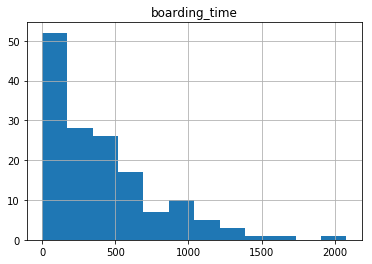

In [13]:
import math  
result_df.hist(column=['boarding_time'], bins= int(math.sqrt(len(result_df.index))))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9180f4f828>]], dtype=object)

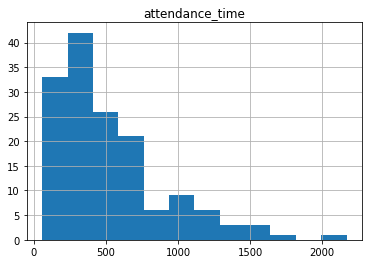

In [12]:
result_df.hist(column=['attendance_time'], bins= int(math.sqrt(len(result_df.index))))